In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet, Lars, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings 
warnings.filterwarnings('ignore')

In [27]:
automobile_df = pd.read_csv('dataset/auto_mpg_processed.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
44,29.8,4,134.0,90,2711,15.5,41
390,21.5,4,121.0,110,2600,12.8,44
311,37.7,4,89.0,62,2050,17.3,40
281,23.5,6,173.0,110,2725,12.6,40
137,13.0,8,302.0,130,3870,15.0,45


In [34]:
featues = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'age']
target = 'mpg'

In [35]:
result_dict = {}

In [36]:
def build_model(regression_fn, name_of_y_col,
                name_of_x_cols, dataset,
                test_frac = 0.2, preprocess_fn = None,
                show_plot_Y = False,
                show_plot_scatter = False):
    
    x = dataset[name_of_x_cols]
    y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        x = preprocess_fn(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_frac)
    
    model = regression_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print('Training Score: ', model.score(x_train, y_train))
    print('Test Score: ', r2_score(y_test, y_pred))
    
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize = (10, 6))
        
        plt.plot(y_pred, label = 'predicted')
        plt.plot(y_test.values,label = 'actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        
        
    if show_plot_scatter == True:
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend('Predicted Line', 'Observed Line')
        plt.show()
        
    return {
        'Training Score': model.score(x_train, y_train),
        'Test Score': r2_score(y_test, y_pred)
          }

In [45]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training Score: ', result_dict[key]['Training Score'])
        print('Test Score: ', result_dict[key]['Test Score'])
        print()

In [38]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize = True)
    model.fit(x_train, y_train)
    
    return model

Training Score:  0.6943938917254657
Test Score:  0.684569564604439


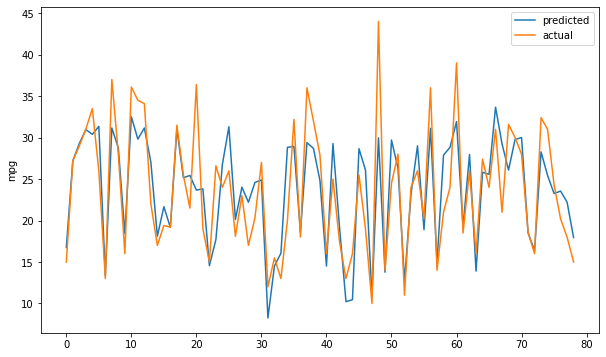

In [39]:
result_dict['mpg - Simple Linear'] = build_model(linear_reg, 'mpg', ['weight'], automobile_df, show_plot_Y = True)

Training Score:  0.8089199925917157
Test Score:  0.8034844341108531


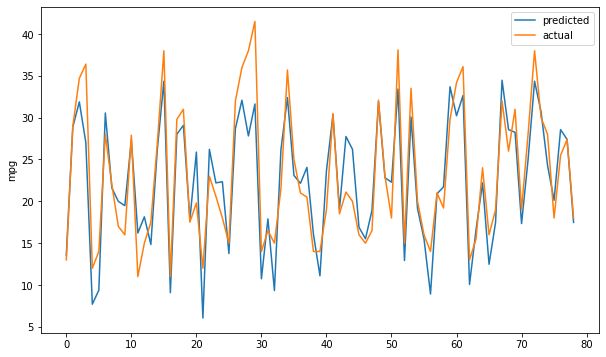

In [40]:
result_dict['mpg - Kitchen Sink Linear'] = build_model(linear_reg, 'mpg', featues, automobile_df, show_plot_Y = True)

Training Score:  0.7155460009813435
Test Score:  0.6570048729737947


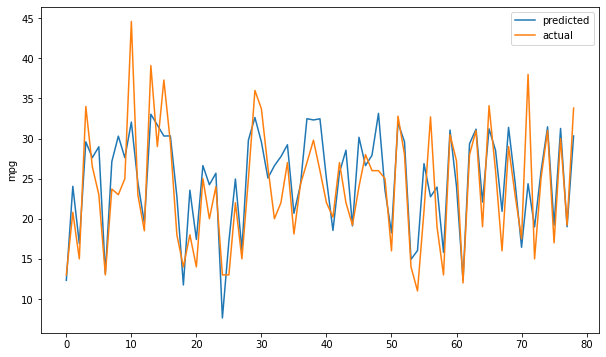

In [47]:
result_dict['mpg - Parsimonous Linear'] = build_model(linear_reg, 'mpg', ['horsepower','weight'],
                                                      automobile_df, show_plot_Y = True)

In [48]:
compare_results()

Regression:  mpg - Simple Linear
Training Score:  0.6943938917254657
Test Score:  0.684569564604439

Regression:  mpg - Kitchen Sink Linear
Training Score:  0.8089199925917157
Test Score:  0.8034844341108531

Regression:  mpg - Parsimonous Linear
Training Score:  0.7155460009813435
Test Score:  0.6570048729737947



In [50]:
def lasso_reg(x_train, y_train, alpha = 0.5):
    model = Lasso(alpha = alpha)
    model.fit(x_train, y_train)
    
    return model

Training Score:  0.8170354274894375
Test Score:  0.7781340125665832


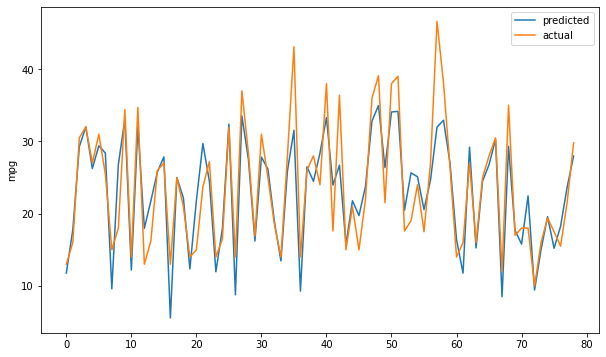

In [51]:
result_dict['mpg - Kitchen sink lasso'] = build_model(lasso_reg, 'mpg', featues, automobile_df, show_plot_Y = True)

In [52]:
def ridge_reg(x_train, y_train, alpha = 0.5, normalize = True):
    model = Ridge(alpha = alpha, normalize = normalize)
    model.fit(x_train, y_train)
    
    return model

Training Score:  0.768471720099997
Test Score:  0.7946719666285764


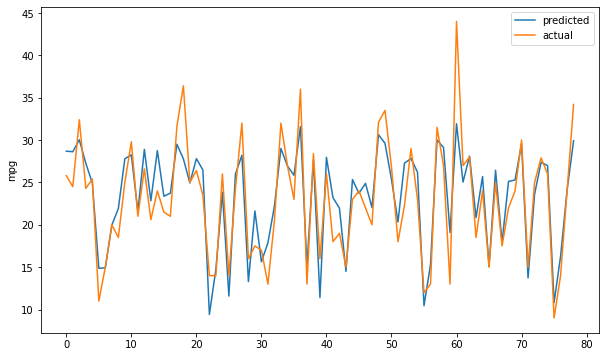

In [53]:
result_dict['mpg - Kitchen sink Ridge'] = build_model(ridge_reg, 'mpg', featues, automobile_df, show_plot_Y = True)

In [54]:
def elastic_net_reg(x_train, y_train, alpha = 1, l1_ratio = 0.5,
                   normalize = False, max_iter = 100000, warm_start = True,
                   equivalent_to = 'Elastic Net'):
    
    print('Equivalent to: ',equivalent_to)
    
    model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, normalize = normalize,
                      max_iter = max_iter, warm_start = warm_start,)
    
    model.fit(x_train, y_train)
    
    return model

Equivalent to:  Elastic Net
Training Score:  0.8048273802918554
Test Score:  0.8072021661289721


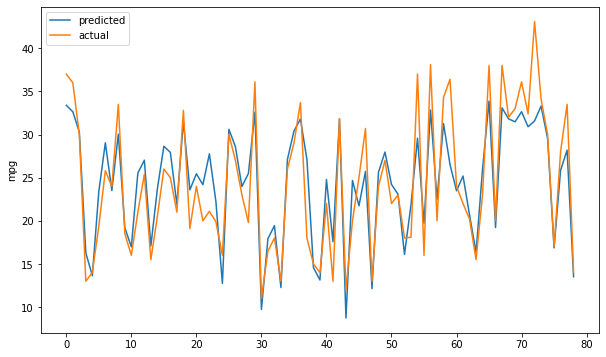

In [55]:
result_dict['mpg - Kitchen sink Elastic Net'] = build_model(elastic_net_reg, 'mpg', featues, automobile_df, show_plot_Y = True)

In [56]:
compare_results()

Regression:  mpg - Simple Linear
Training Score:  0.6943938917254657
Test Score:  0.684569564604439

Regression:  mpg - Kitchen Sink Linear
Training Score:  0.8089199925917157
Test Score:  0.8034844341108531

Regression:  mpg - Parsimonous Linear
Training Score:  0.7155460009813435
Test Score:  0.6570048729737947

Regression:  mpg - Kitchen sink lasso
Training Score:  0.8170354274894375
Test Score:  0.7781340125665832

Regression:  mpg - Kitchen sink Ridge
Training Score:  0.768471720099997
Test Score:  0.7946719666285764

Regression:  mpg - Kitchen sink Elastic Net
Training Score:  0.8048273802918554
Test Score:  0.8072021661289721



In [57]:
from functools import partial

Equivalent to:  OLS
Training Score:  0.8087558217742488
Test Score:  0.8075744858725825


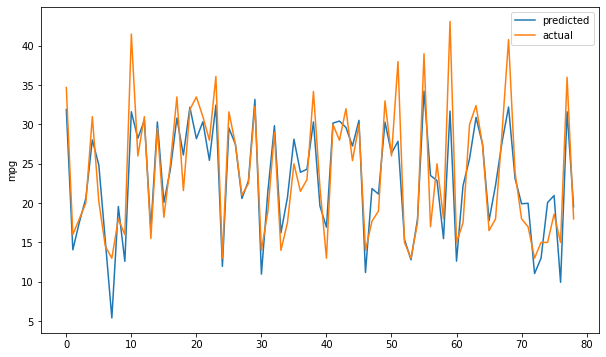

In [70]:
result_dict['mpg - Kitchen sink Elastic Net OLS'] = build_model(partial(elastic_net_reg,
                                                                                 alpha = 0, equivalent_to = 'OLS'),
                                                                         'mpg', featues, automobile_df, show_plot_Y = True)

In [71]:
compare_results()

Regression:  mpg - Simple Linear
Training Score:  0.6943938917254657
Test Score:  0.684569564604439

Regression:  mpg - Kitchen Sink Linear
Training Score:  0.8089199925917157
Test Score:  0.8034844341108531

Regression:  mpg - Parsimonous Linear
Training Score:  0.7155460009813435
Test Score:  0.6570048729737947

Regression:  mpg - Kitchen sink lasso
Training Score:  0.8170354274894375
Test Score:  0.7781340125665832

Regression:  mpg - Kitchen sink Ridge
Training Score:  0.768471720099997
Test Score:  0.7946719666285764

Regression:  mpg - Kitchen sink Elastic Net
Training Score:  0.8048273802918554
Test Score:  0.8072021661289721

Regression:  mpg - Kitchen sink Elastic Net with partial
Training Score:  0.8160814995097075
Test Score:  0.776929748396844

Regression:  mpg - Kitchen sink Elastic Net OLS
Training Score:  0.8087558217742488
Test Score:  0.8075744858725825



Equivalent to:  Lasso
Training Score:  0.7922102038763108
Test Score:  0.8400783914777858


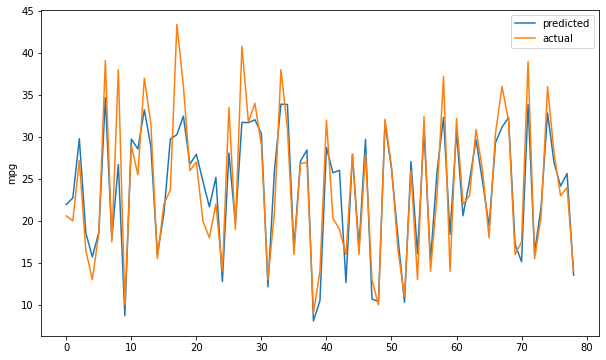

In [72]:
result_dict['mpg - Kitchen sink Elastic Net lasso'] = build_model(partial(elastic_net_reg, l1_ratio = 1,
                                                                                 alpha = 1, equivalent_to = 'Lasso'),
                                                                         'mpg', featues, automobile_df, show_plot_Y = True)

In [73]:
compare_results()

Regression:  mpg - Simple Linear
Training Score:  0.6943938917254657
Test Score:  0.684569564604439

Regression:  mpg - Kitchen Sink Linear
Training Score:  0.8089199925917157
Test Score:  0.8034844341108531

Regression:  mpg - Parsimonous Linear
Training Score:  0.7155460009813435
Test Score:  0.6570048729737947

Regression:  mpg - Kitchen sink lasso
Training Score:  0.8170354274894375
Test Score:  0.7781340125665832

Regression:  mpg - Kitchen sink Ridge
Training Score:  0.768471720099997
Test Score:  0.7946719666285764

Regression:  mpg - Kitchen sink Elastic Net
Training Score:  0.8048273802918554
Test Score:  0.8072021661289721

Regression:  mpg - Kitchen sink Elastic Net with partial
Training Score:  0.8160814995097075
Test Score:  0.776929748396844

Regression:  mpg - Kitchen sink Elastic Net OLS
Training Score:  0.8087558217742488
Test Score:  0.8075744858725825

Regression:  mpg - Kitchen sink Elastic Net lasso
Training Score:  0.7922102038763108
Test Score:  0.840078391477785

Equivalent to:  Lasso
Training Score:  0.8068873092923419
Test Score:  0.8112249404673095


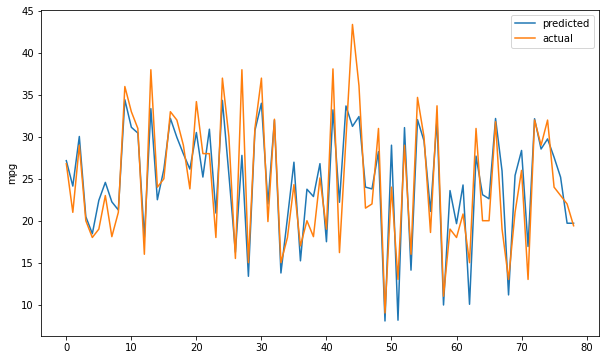

In [74]:
result_dict['mpg - Kitchen sink Elastic Net Ridge'] = build_model(partial(elastic_net_reg, l1_ratio = 1,
                                                                                 alpha = 0, equivalent_to = 'Lasso'),
                                                                         'mpg', featues, automobile_df, show_plot_Y = True)

In [75]:
compare_results()

Regression:  mpg - Simple Linear
Training Score:  0.6943938917254657
Test Score:  0.684569564604439

Regression:  mpg - Kitchen Sink Linear
Training Score:  0.8089199925917157
Test Score:  0.8034844341108531

Regression:  mpg - Parsimonous Linear
Training Score:  0.7155460009813435
Test Score:  0.6570048729737947

Regression:  mpg - Kitchen sink lasso
Training Score:  0.8170354274894375
Test Score:  0.7781340125665832

Regression:  mpg - Kitchen sink Ridge
Training Score:  0.768471720099997
Test Score:  0.7946719666285764

Regression:  mpg - Kitchen sink Elastic Net
Training Score:  0.8048273802918554
Test Score:  0.8072021661289721

Regression:  mpg - Kitchen sink Elastic Net with partial
Training Score:  0.8160814995097075
Test Score:  0.776929748396844

Regression:  mpg - Kitchen sink Elastic Net OLS
Training Score:  0.8087558217742488
Test Score:  0.8075744858725825

Regression:  mpg - Kitchen sink Elastic Net lasso
Training Score:  0.7922102038763108
Test Score:  0.840078391477785

Equivalent to:  Elastic Net
Training Score:  0.8041668520418266
Test Score:  0.8196750435878418


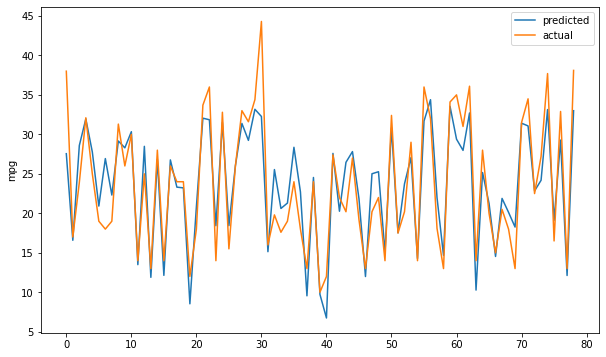

In [76]:
result_dict['mpg - Kitchen sink Elastic Net'] = build_model(partial(elastic_net_reg, l1_ratio = 1,
                                                                                 alpha = 0.5, equivalent_to = 'Elastic Net'),
                                                                         'mpg', featues, automobile_df, show_plot_Y = True)

In [77]:
compare_results()

Regression:  mpg - Simple Linear
Training Score:  0.6943938917254657
Test Score:  0.684569564604439

Regression:  mpg - Kitchen Sink Linear
Training Score:  0.8089199925917157
Test Score:  0.8034844341108531

Regression:  mpg - Parsimonous Linear
Training Score:  0.7155460009813435
Test Score:  0.6570048729737947

Regression:  mpg - Kitchen sink lasso
Training Score:  0.8170354274894375
Test Score:  0.7781340125665832

Regression:  mpg - Kitchen sink Ridge
Training Score:  0.768471720099997
Test Score:  0.7946719666285764

Regression:  mpg - Kitchen sink Elastic Net
Training Score:  0.8041668520418266
Test Score:  0.8196750435878418

Regression:  mpg - Kitchen sink Elastic Net with partial
Training Score:  0.8160814995097075
Test Score:  0.776929748396844

Regression:  mpg - Kitchen sink Elastic Net OLS
Training Score:  0.8087558217742488
Test Score:  0.8075744858725825

Regression:  mpg - Kitchen sink Elastic Net lasso
Training Score:  0.7922102038763108
Test Score:  0.840078391477785

In [78]:
def svr_reg(x_train, y_train, kernel = 'linear', epsilon = 0.05, C = 0.3):
    model = SVR(kernel = kernel, epsilon = epsilon, C = C)
    model.fit(x_train, y_train)
    
    return model

Training Score:  0.7909479990893291
Test Score:  0.8336568374905278


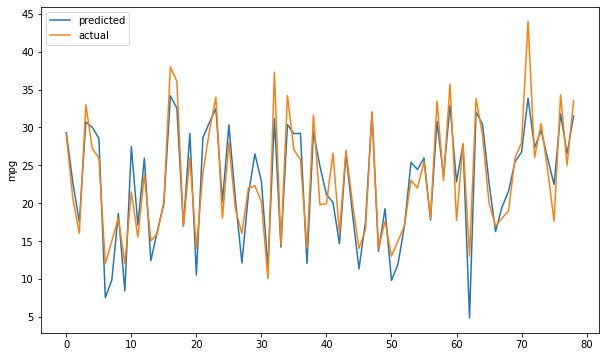

In [79]:
result_dict['mpg - Kitchen sink SVR'] = build_model(svr_reg,'mpg', featues, automobile_df, show_plot_Y = True)

In [82]:
def knneighbors_reg(x_train, y_train, n_neighbors = 10):
    model = KNeighborsRegressor(n_neighbors = n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training Score:  0.7653627600616373
Test Score:  0.7442323469039613


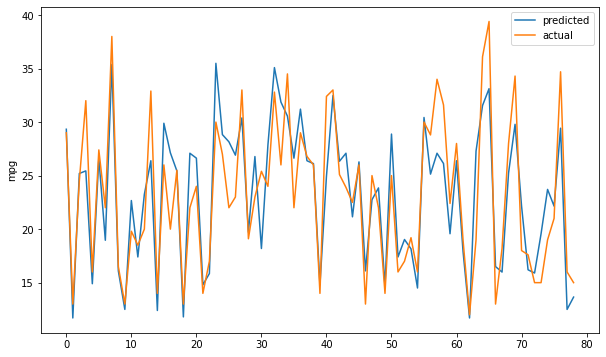

In [83]:
result_dict['mpg - Kitchen sink KNNeighbors'] = build_model(knneighbors_reg,'mpg', featues, automobile_df, show_plot_Y = True)

In [84]:
compare_results()

Regression:  mpg - Simple Linear
Training Score:  0.6943938917254657
Test Score:  0.684569564604439

Regression:  mpg - Kitchen Sink Linear
Training Score:  0.8089199925917157
Test Score:  0.8034844341108531

Regression:  mpg - Parsimonous Linear
Training Score:  0.7155460009813435
Test Score:  0.6570048729737947

Regression:  mpg - Kitchen sink lasso
Training Score:  0.8170354274894375
Test Score:  0.7781340125665832

Regression:  mpg - Kitchen sink Ridge
Training Score:  0.768471720099997
Test Score:  0.7946719666285764

Regression:  mpg - Kitchen sink Elastic Net
Training Score:  0.8041668520418266
Test Score:  0.8196750435878418

Regression:  mpg - Kitchen sink Elastic Net with partial
Training Score:  0.8160814995097075
Test Score:  0.776929748396844

Regression:  mpg - Kitchen sink Elastic Net OLS
Training Score:  0.8087558217742488
Test Score:  0.8075744858725825

Regression:  mpg - Kitchen sink Elastic Net lasso
Training Score:  0.7922102038763108
Test Score:  0.840078391477785

In [85]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [89]:
def sgd_reg(x_train, y_train, max_iter = 10000, tol=1e-3):
    model = SGDRegressor(max_iter = max_iter, tol = tol)
    model.fit(x_train, y_train)
    
    return model

Training Score:  0.8022641652934678
Test Score:  0.814677085107778


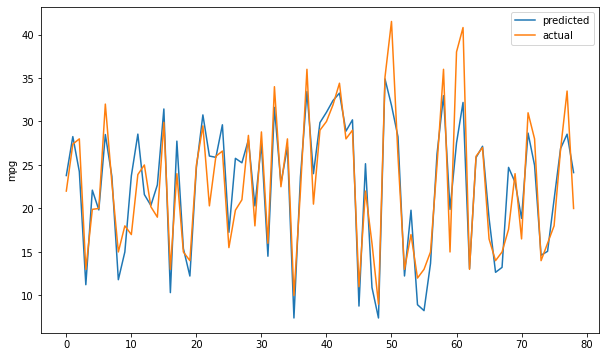

In [90]:
result_dict['mpg - Kitchen sink SGDRegressor'] = build_model(sgd_reg,'mpg', featues, automobile_df,
                                                             show_plot_Y = True, preprocess_fn = apply_standard_scaler)

In [91]:
def decision_tree_reg(x_train, y_train, max_depth =2):
    model = DecisionTreeRegressor(max_depth = max_depth)
    model.fit(x_train, y_train)
    
    return model

Training Score:  0.7269114574203064
Test Score:  0.7498552763419135


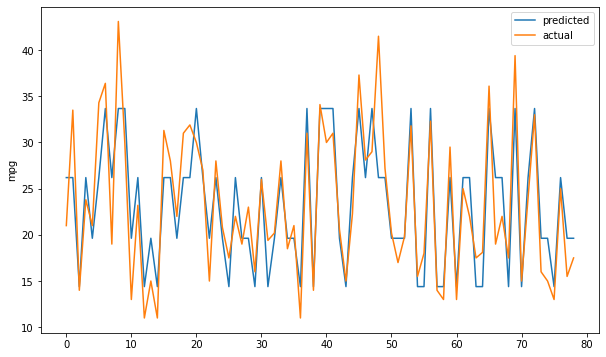

In [92]:
result_dict['mpg - Kitchen sink SVR'] = build_model(decision_tree_reg,'mpg', featues, automobile_df, show_plot_Y = True)

In [96]:
def lars_reg(x_train, y_train, n_nonzero_coefs = 4):
    model = Lars(n_nonzero_coefs = n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training Score:  0.815173530576306
Test Score:  0.753724141440377


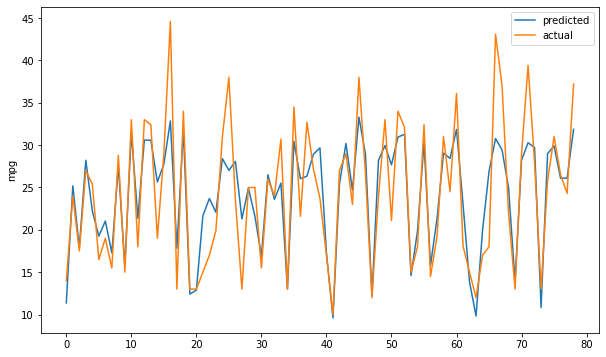

In [97]:
result_dict['mpg - Kitchen sink LARS'] = build_model(lars_reg,'mpg', featues, automobile_df, show_plot_Y = True)